In [ ]:
# imports
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import math
import random
import re
import argparse
import os



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'W266 Final Project/data/BART/'

Mounted at /content/gdrive


In [ ]:
# Create a dataloading module as per the PyTorch Lightning Docs
train_df = pd.read_csv('./gdrive/MyDrive/W266 Final Project/data/T5/train.csv')

val_df = pd.read_csv('./gdrive/MyDrive/W266 Final Project/data/T5/val.csv')

test_df = pd.read_csv('./gdrive/MyDrive/W266 Final Project/data/T5/test.csv')

In [ ]:
df = train_df.append([val_df, test_df])
df

,song_id,inputs,targets,targets_10,targets_20
0,Macklemore-and-ryan-lewis-wings-lyrics,\n\n[Verse 1: Macklemore]\nI was seven years o...,<extra_id_0>\n\n[Hook: Children Choir]\nI wann...,<extra_id_0> [Hook: Children Choir] I wanna fl...,<extra_id_0> [Hook: Children Choir] I wanna fl...
1,Macklemore-and-ryan-lewis-wings-lyrics,\n\n[Verse 1: Macklemore]\nI was seven years o...,<extra_id_0>\n\n[Hook: Children Choir]\nI wann...,<extra_id_0> [Hook: Children Choir] I wanna fl...,<extra_id_0> [Hook: Children Choir] I wanna fl...
2,Curren-y-privacy-glass-lyrics,\n\n[Intro]\nOne time for the weed\nOne time f...,<extra_id_0>\n\n[Hook]\nAnd I usually don't ri...,<extra_id_0> [Hook] And I usually don't ride l...,<extra_id_0> [Hook] And I usually don't ride l...
3,Curren-y-privacy-glass-lyrics,\n\n[Intro]\nOne time for the weed\nOne time f...,<extra_id_0>\n\n[Hook],<extra_id_0> [Hook],<extra_id_0> [Hook]
4,Beyonce-mi-gente-homecoming-live-lyrics,"\n\n[Intro: Beyoncé & Mr. Vegas]\n(Turn up, Be...",<extra_id_0>\n\n[Pre-Chorus: Willy William & B...,<extra_id_0> [Pre-Chorus: Willy William & Beyo...,<extra_id_0> [Pre-Chorus: Willy William & Beyo...
...,...,...,...,...,...
1312,Trey-songz-blessed-lyrics,\n\n[Intro: DJ Drama]\nTo whom it may concern\...,"<extra_id_0>\n\n[Hook]\nNow tell me God, how c...","<extra_id_0> [Hook] Now tell me God, how can y...","<extra_id_0> [Hook] Now tell me God, how can y..."
1313,Trey-songz-blessed-lyrics,\n\n[Intro: DJ Drama]\nTo whom it may concern\...,"<extra_id_0>\n\n[Hook]\nNow tell me God, how c...","<extra_id_0> [Hook] Now tell me God, how can y...","<extra_id_0> [Hook] Now tell me God, how can y..."
1314,Trey-songz-blessed-lyrics,\n\n[Intro: DJ Drama]\nTo whom it may concern\...,"<extra_id_0>\n\n[Hook]\nNow tell me God, how c...","<extra_id_0> [Hook] Now tell me God, how can y...","<extra_id_0> [Hook] Now tell me God, how can y..."
1315,Mac-miller-aquarium-lyrics,\n\n[Intro]\n(Yeah)\nCan you feel it?\nDon't a...,<extra_id_0>\n\n[Hook]\nI'm wearing a blindfol...,"<extra_id_0> [Hook] I'm wearing a blindfold, l...","<extra_id_0> [Hook] I'm wearing a blindfold, l..."


In [ ]:
df = df.sort_values(by="song_id").drop_duplicates(subset=["song_id"], keep="last")
df = df.drop(columns=['targets_10', 'targets_20'])
df

,song_id,inputs,targets
348,112-peaches-and-cream-lyrics,"\n\nSo hot, hot\nIt's the S the L the I the M\...",<extra_id_0>\n\n[Hook - 112 (Slim)]\nPeaches a...
937,116-and-lecrae-california-dreamin-lyrics,\n\n[Intro: Lecrae]\nZaytoven\nYeah\nWhat up W...,<extra_id_0>\n\n[Chorus: John Givez]\nCali dre...
842,116-authority-lyrics,\n\n[Intro: Lecrae]\nWhoa\nIf you can't follow...,<extra_id_0>\n\n[Hook: Lecrae (Tedashii)]\nIf ...
6742,1wayfrank-make-it-happen-lyrics,\n\n\n\n[Verse 1: 1wayfrank]\nI been standin' ...,<extra_id_0>\n\n[HOOK: 1WayFrank]\nI Been trap...
3004,2-chainz-36-lyrics,"\n\n\n\n[Verse 1]\nWhip that shit, with my wri...",<extra_id_0>\n\n[Hook]
...,...,...,...
384,Yung-lean-visions-of-u-lyrics,\n\n\n\n[Verse 1]\nI turn nothing to everythin...,<extra_id_0>\n\n[Hook]\nI'm the angel of darkn...
4707,Zayn-i-wont-mind-lyrics,\n\n[Verse 1]\nDon't look around 'cause love i...,<extra_id_0>\n\n[Chorus]\n'Cause we are who we...
2428,Zayn-pillowtalk-tyler-the-creator-remix-lyrics,\n\n[Verse 1]\nClimb on board\nWe'll go slow a...,<extra_id_0>\n\n[Chorus]\nSo we'll piss off th...
6851,Zaytoven-east-atlanta-day-lyrics,\n\n[Intro: Gucci Mane]\nEast Atlanta Day\nWe ...,<extra_id_0>\n\n[Chorus: Gucci Mane]\nI just p...


In [ ]:
df['inputs'] = df['inputs'].apply(lambda x : re.sub("<extra_id_0>", "", x))
df['targets'] = df['targets'].apply(lambda x : re.sub("<extra_id_0>", "", x))

def preprocess(sentence):
    sentence=str(sentence)

    #uncased means words are all lowercased
    sentence = sentence.lower()

    # remove chorus and verse titles
    # remove the brackets and everything in the brackets
    sentence = re.sub("[\[].*?[\]]", "", sentence)
   
    # replace parentheses only
    sentence = re.sub("[\(\)]", "", sentence) 

    sentence = re.sub(",", " ", sentence)

    return sentence

In [ ]:
inputs = []
for input in df['inputs']:
  input = preprocess(input)
  inputs.append(input)

df['inputs'] = inputs

In [ ]:
df

In [ ]:
outputs = []
for output in df['targets']:
  output = preprocess(output)
  outputs.append(output)

df['targets'] = outputs

In [ ]:
c_num_lines = df.inputs.str.split('\n').str.len()

v_num_lines = df.targets.str.split('\n').str.len()

In [ ]:
stop = stopwords.words('english') + ['i\'m', 'yeah', 'ain\'t', 'can\'t']

df['inputs_no_stopwords'] = df['inputs'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['targets_no_stopwords'] = df['targets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
if 'not' in stop:
  print(True)
else:
  print(False)

True


In [ ]:
# stats for verses
num_chars = df.inputs_no_stopwords.str.len()
num_words = df.inpuinputs_no_stopwordsts.str.split().str.len()
num_uniq_words = df.inputs_no_stopwords.apply(lambda x: len(set(x.split())))

In [ ]:
df['v_num_chars'] = num_chars
df['v_num_words'] = num_words
df['v_num_lines'] = v_num_lines
df['v_num_uniq_words'] = num_uniq_words
df['v_lexical_density'] = df['v_num_uniq_words'] / df['v_num_words']

In [ ]:
# stats for choruses
num_chars = df.targets_no_stopwords.str.len()
num_words = df.targets_no_stopwords.str.split().str.len()
num_uniq_words = df.targets_no_stopwords.apply(lambda x: len(set(x.split())))

In [ ]:
df['c_num_chars'] = num_chars
df['c_num_words'] = num_words
df['c_num_lines'] = c_num_lines
df['c_num_uniq_words'] = num_uniq_words
df['c_lexical_density'] = df['c_num_uniq_words'] / df['c_num_words']

In [ ]:
df

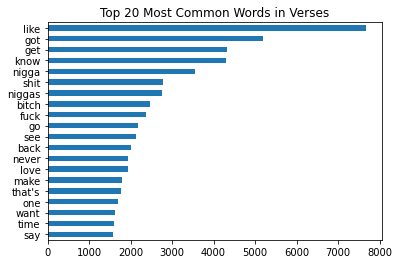

In [ ]:
# top 20 most common words in verses
pd.Series(' '.join(df.inputs_no_stopwords).lower().split()).value_counts()[:20][::-1].plot(kind='barh', title='Top 20 Most Common Words in Verses')


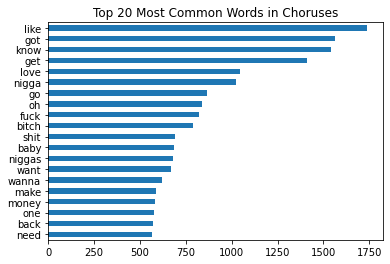

In [ ]:
# top 20 most common words in chorus
pd.Series(' '.join(df.targets_no_stopwords).lower().split()).value_counts()[:20][::-1].plot(kind='barh', title='Top 20 Most Common Words in Choruses')
